# Visualizing Earnings Based on College Major

In this project we're going to use pandas plotting along with visualizations to explore the dataset of job outcomes of students who graduated from 2010 to 2012. Each row in the dataset represents a different college major and has information including median salaries, gender diversity, employment rates and so on along the columns.

Our goal is to answer questions such as;
-  Do students in more popuar majors make more money ?
-  How many majors are predominantly male and female ?
- Which category of majors have the most students ?

In [2]:
# import pandas and matplotlib libraries, read csv into a dataframe
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
recent_grads = pd.read_csv('recent-grads.csv')

Descriptions for each column:

- Rank : Rank by median earnings (dataset is ordered by rank column)
- Major_code : Major code
- Major : Description of major
- Major_category : Category of major
- Total : Total number of people with major
- Sample_size : Same size (unweighted) of full-time
- Men : Male graduates
- Women : Women graduates
- ShareWomen : Women as share of total
- Employed : Number employed
- Median : Median salary of full-time, year-round workers 
- Low_wage_jobs : Number in low-wage service jobs
- Full_time : Number employed 35 hours or more per week
- Part_time : Number employed less than 35 hours per week

Lets use iloc to return the first row formatted as a table, head()/tail() to see how the data is structured and describe() to get summary statistics for all the numeric columns.

In [3]:
# return first row as a table
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [4]:
# view how the data is structured
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [5]:
#last 5 rows of the data set
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [6]:
# summary statistics for numerical columns
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


Since matplotlib expects that columns of values we pass in to have matching lengths we'll drop rows with missing values with dropna().

In [7]:
recent_grads = recent_grads.dropna()

# **ScatterPlots**

Next we're going to use scatter plots to answer the following questions :
1. Do students in more popular majors make more money ?
2. Do students that majored in subjects that were majority female make more money ?
3. Is there any link between the number of full-time employees and median salary ?

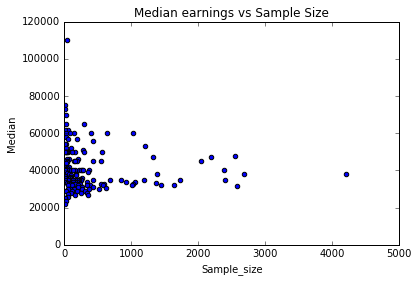

In [8]:
#Sample_size & Median earnings scatter
ax = recent_grads.plot(x='Sample_size', y='Median', kind='scatter', title='Median earnings vs Sample Size', xlim=(0,5000))

Since a large amount of our plots are bunched together we can take a closer look by setting the ylim for sample_size between 0 and 1000.

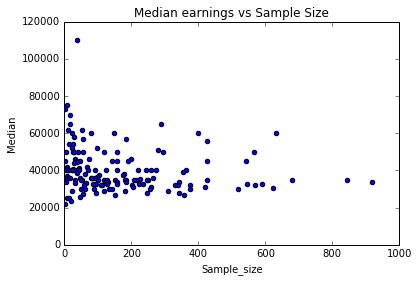

In [9]:
# closer look into the above graph
ax = recent_grads.plot(x='Sample_size', y='Median', kind='scatter', title='Median earnings vs Sample Size', xlim=(0,1000))

 **1) Do students in popular majors make more money ?** 

From the scatter plot above we can come to the conclusion that popular majors do not necessarily make more money as there is no strong correlation between the median and sample size.

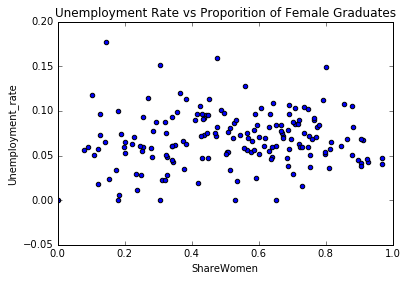

In [10]:
#ShareWomen & Unemployment_rate scatter
ax = recent_grads.plot(x='ShareWomen',y='Unemployment_rate',kind='scatter', xlim=(0,1))
ax.set_title('Unemployment Rate vs Proporition of Female Graduates')

The scatter plot above shows weak correlation between the unemployment rate and the proporition of female graduates

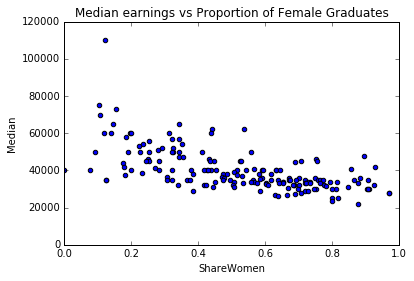

In [11]:
#ShareWomen and Median earnings scatter
ax = recent_grads.plot(x='ShareWomen', y='Median', kind='scatter',xlim=(0,1.0))
ax.set_title('Median earnings vs Proportion of Female Graduates')

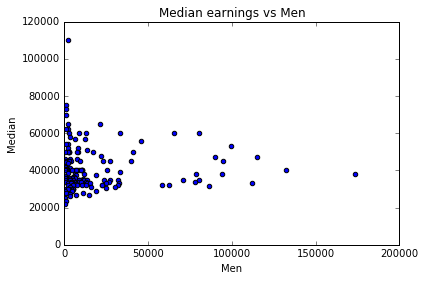

In [12]:
#Men and Median earnings scatter
ax = recent_grads.plot(x='Men',y='Median',kind='scatter', xlim=(0,200000))
ax.set_title('Median earnings vs Men')

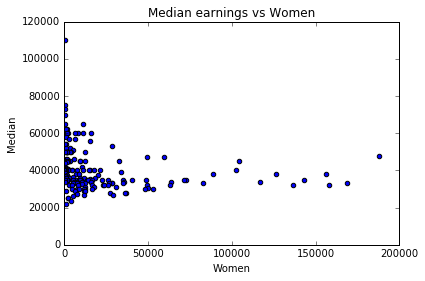

In [13]:
#Women and Median earnings scatter
ax = recent_grads.plot(x='Women',y='Median',kind='scatter', xlim=(0,200000))
ax.set_title('Median earnings vs Women')

** 2) Do students that majored in subjects that were majority female make more money ? **

No, there is no correlation between higher earnings and subjects that were majored in that were majority female. We can see that the higher the proporition of women the lower the median salary. This can be due to a number of reasons, possibly there is a large number of these plots are majors that are in fields that pay lower than some of the high paying fields. Keep in mind the median earnings is based of full time employees (40+ hours a week) so we can rule out the possbility that some of these plots are based off part time earnings.

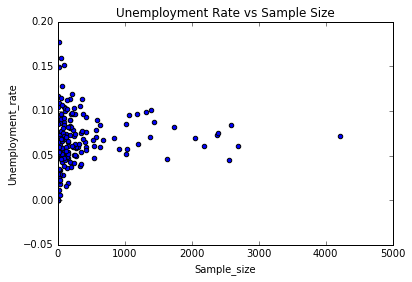

In [14]:
#Sample_size & Unemployment scatter
ax = recent_grads.plot(x='Sample_size',y='Unemployment_rate',kind='scatter', xlim=(0,5000))
ax.set_title('Unemployment Rate vs Sample Size')

We can see a lot of variance in unemployment rates for majors with small sample sizes.

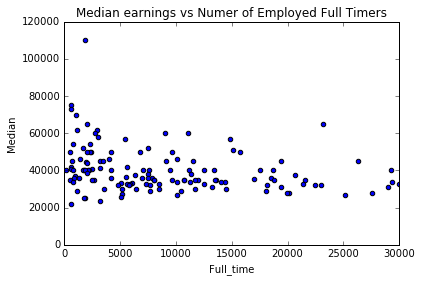

In [15]:
#Full_time & median scatter
ax = recent_grads.plot(x='Full_time',y='Median',kind='scatter', xlim=(0,30000), ylim=(0,120000))
ax.set_title('Median earnings vs Numer of Employed Full Timers')

 **3. Is there any link between the number of full-time employees and median salary ?  **
 
 There is not much correlation between the number of full-time employees and median earnings, if there was a relationship it would be a positive one though as more full-time employees leads to higher median earnings.

# **Histograms**

Next we're going to use histograms to explore the distributions of the following columns:
- Sample_size
- Median
- Employed
- Full_time
- ShareWomen
- Unemployment_rate
- Men
- Women

Some of the questions we want to answer along the way are:
1. How many majors are predominately male ?
2. How many majors are predominately women ?
3. What is the most common salary range in the data set ?
4. Which majors have the highest unemployment rate ?


We will also experiment each with different bin sizes.

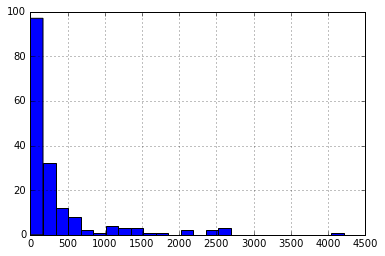

In [29]:
#Sample size histogram, 25 bins
recent_grads['Sample_size'].hist(bins = 25)

Since the majority is between 0 and 500 we'll examine that range closer.

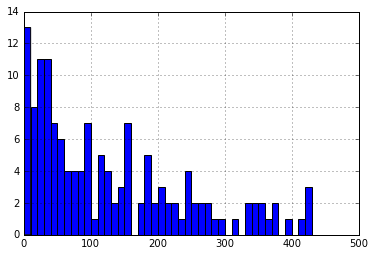

In [30]:
#Sample size histogram, 50 bins, range 0,500.
recent_grads['Sample_size'].hist(bins=50, range=(0,500))

The majority of the sample sizes were less than 100 which leads us to ask how accurate some of the data is like salaries, they could possibly be skewed because of such small sample sizes.

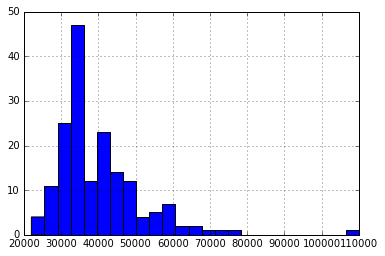

In [31]:
#Median earnings histogram, 25 bins
recent_grads['Median'].hist(bins=25)

Since we have barley any values after the 80,000 mark we'll create another histogram with 50 bins in the 20k-80k range.

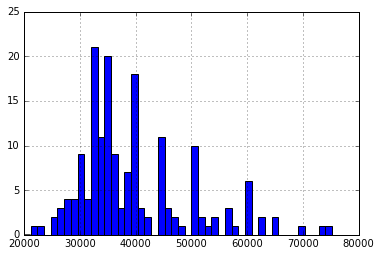

In [32]:
#Median earnings histogram, 50 bins, range 20000-80000
recent_grads['Median'].hist(bins=50,range=(20000,80000))

**- What is the most common salary range in the data set ?**

After taking a closer look in between the 20k-80k range we can see the most common salary range is around 30k-40k. Lets use value_counts with 10 bins to see if this is correct.

In [33]:
#Value counts to prove range is correct, 10 bins.
recent_grads['Median'].value_counts(bins=10)

(30800.0, 39600.0]      75
(39600.0, 48400.0]      40
(21911.999, 30800.0]    24
(48400.0, 57200.0]      18
(57200.0, 66000.0]      11
(66000.0, 74800.0]       2
(101200.0, 110000.0]     1
(74800.0, 83600.0]       1
(92400.0, 101200.0]      0
(83600.0, 92400.0]       0
Name: Median, dtype: int64

As we can see, 75 counts for salaries between 30k-39k so we were correct in saying the most common range is between 30k-40k.

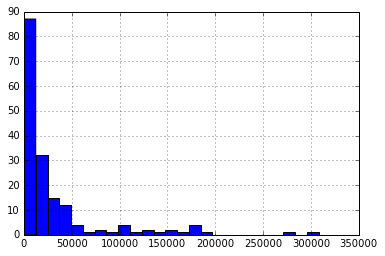

In [28]:
#Employed histogram, 25 bins
recent_grads['Employed'].hist(bins=25)

Majority of our values are falling between 0-50000 so lets observe that range.

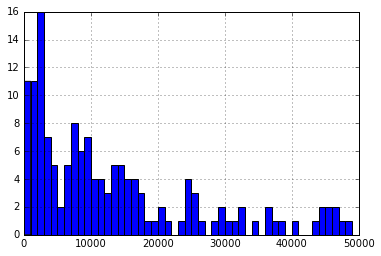

In [36]:
#Employed histogram, 50 bins, range 0-50000
recent_grads['Employed'].hist(bins=50, range=(0,50000))

We can assume that the number of employed goes up if there is a higher amount of students who have graduated with that major. Higher the volume of major graduates, the higher the number number of employed.

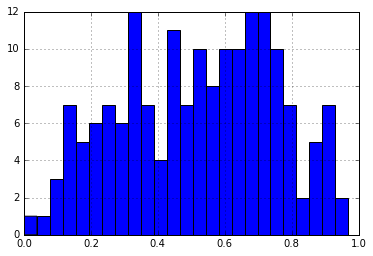

In [57]:
#ShareWomen histogram, 25 bins.
recent_grads['ShareWomen'].hist(bins=25)

The highest frequency range of majors with majority graduates being female is around 70-80% so lets take a closer look at majors in that range.

In [68]:
#taking a closer look at what majors fall between our range of 70-80% female
majors_majority_female = recent_grads[recent_grads['ShareWomen'] >= 0.7]
majors_majority_female.sort_values(by='ShareWomen', ascending=False).head(5)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
164,165,2307,EARLY CHILDHOOD EDUCATION,37589.0,1167.0,36422.0,Education,0.968954,342,32551,...,7001,20748,1360,0.040105,28000,21000,35000,23515,7705,2868
163,164,6102,COMMUNICATION DISORDERS SCIENCES AND SERVICES,38279.0,1225.0,37054.0,Health,0.967998,95,29763,...,13862,14460,1487,0.047584,28000,20000,40000,19957,9404,5125
51,52,6104,MEDICAL ASSISTING SERVICES,11123.0,803.0,10320.0,Health,0.927807,67,9168,...,4107,4290,407,0.042507,42000,30000,65000,2091,6948,1270
138,139,2304,ELEMENTARY EDUCATION,170862.0,13029.0,157833.0,Education,0.923745,1629,149339,...,37965,86540,7297,0.046586,32000,23400,38000,108085,36972,11502
150,151,2901,FAMILY AND CONSUMER SCIENCES,58001.0,5166.0,52835.0,Industrial Arts & Consumer Services,0.910933,518,46624,...,15872,26906,3355,0.067128,30000,22900,40000,20985,20133,5248


In [70]:
majors_majority_female.shape

(45, 21)

** - What majors are predominately women ?**

There are 45 majors that are predominately women (over 70%). The top 5 majors that are predominately women are; Early childhood education, Communication disorders sciences and services, Medical assisting services, elementary education, and family and consumer sciences.

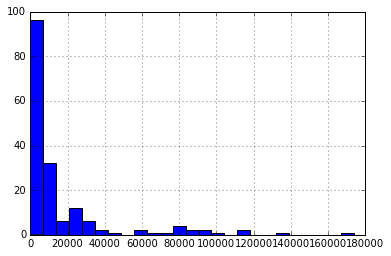

In [71]:
#Male histogram, 25 bins
recent_grads['Men'].hist(bins=25)

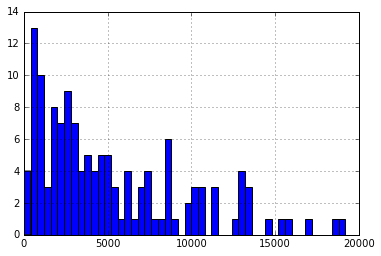

In [102]:
#Male histogram, 25 bins
recent_grads['Men'].hist(bins=50, range=(0,20000))

In [132]:
#lets find predominately male majors by viewing least amount of ShareWomen values
majors_majority_male = recent_grads[recent_grads['ShareWomen'] < 0.1]
majors_majoirty_male.sort_values(by='ShareWomen', ascending=True).head(5)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
8,9,2414,MECHANICAL ENGINEERING,91227.0,80320.0,10907.0,Engineering,0.119559,1029,76442,...,13101,54639,4650,0.057342,60000,48000,70000,52844,16384,3253
9,10,2408,ELECTRICAL ENGINEERING,81527.0,65511.0,16016.0,Engineering,0.196450,631,61928,...,12695,41413,3895,0.059174,60000,45000,72000,45829,10874,3170
20,21,2102,COMPUTER SCIENCE,128319.0,99743.0,28576.0,Computers & Mathematics,0.222695,1196,102087,...,18726,70932,6884,0.063173,53000,39000,70000,68622,25667,5144
35,36,6207,FINANCE,174506.0,115030.0,59476.0,Business,0.340825,2189,145696,...,21463,108595,9413,0.060686,47000,35000,64000,24243,48447,9910
36,37,5501,ECONOMICS,139247.0,89749.0,49498.0,Social Science,0.355469,1322,104117,...,25325,70740,11452,0.099092,47000,35000,65000,25582,37057,10653


**- What majors are predominately Male ?**

Looking at the data above we can see that Mechanical Engineering, Electrical Engineering, and Computer Science are heavily dominated by males with women making up less than 20% of those totals.

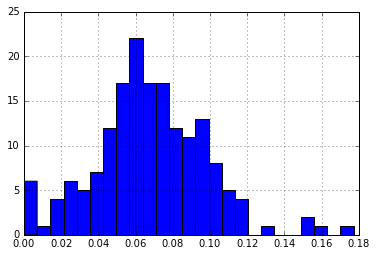

In [133]:
#Unemployment_rate histogram, 25 bins.
recent_grads['Unemployment_rate'].hist(bins=25)

The most common unemployment rates fall between the .05-.10 range. However there is unemployment rates greate than 12%.

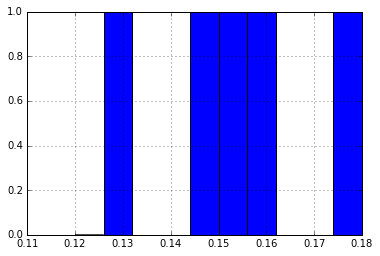

In [157]:
#Unemployment_rate histogram, 10 bins, range .12-.18
recent_grads['Unemployment_rate'].hist(bins=10, range=(.12,.18))

In [159]:
high_unemployment = recent_grads[recent_grads['Unemployment_rate'] >= 0.14]
high_unemployment.sort_values(by='Unemployment_rate', ascending=False)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
5,6,2418,NUCLEAR ENGINEERING,2573.0,2200.0,373.0,Engineering,0.144967,17,1857,...,264,1449,400,0.177226,65000,50000,102000,1142,657,244
89,90,5401,PUBLIC ADMINISTRATION,5629.0,2947.0,2682.0,Law & Public Policy,0.476461,46,4158,...,847,2952,789,0.159491,36000,23000,60000,919,2313,496
84,85,2107,COMPUTER NETWORKING AND TELECOMMUNICATIONS,7613.0,5291.0,2322.0,Computers & Mathematics,0.305005,97,6144,...,1447,4369,1100,0.151850,36400,27000,49000,2593,2941,352
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622


**- Which majors have the highest unemployment rate ?**

Above we can see that Nuclear Engineering, Public Administration, Computer Networking & Telecommunications, and Clincal Psychology have the highest unemployment rates.

# ScatterMatrix

A scatter matrix plot combines both scatter plots and hisograms into one grid of plots and allows us to explore potential relationshops and distributions simultaneously.

Pandas has a function called scatter_matrix() that generates the plots for us.

In [160]:
#import scatter_matrix from pandas.plotting module
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f10a7b95eb8>,
      dtype=object)

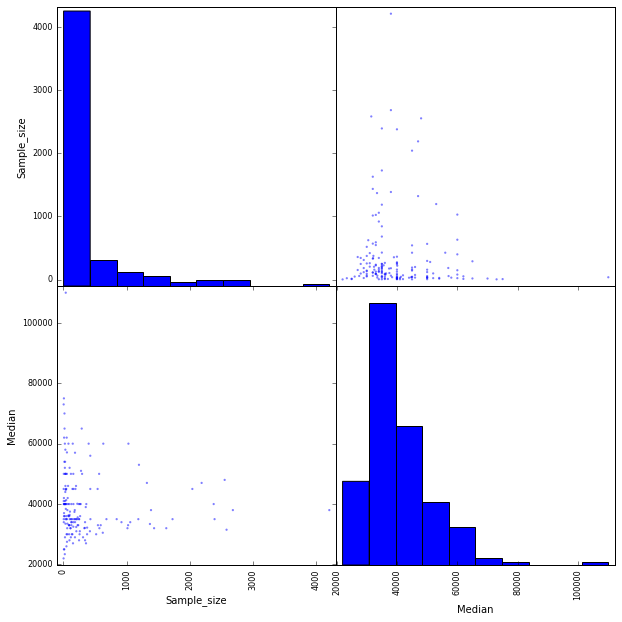

In [163]:
# 2 by 2 scatter matrix plot Sample_size and Median
scatter_matrix(recent_grads[['Sample_size','Median']], figsize=(10,10))

The sample_size vs Median earnings scatter shows no relationship between the two. The other scatter on the top right shows a few outliers on the top portion of the scatter confirming that the most common median earnings are between 30k-40k.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f10a735b4e0>,
      dtype=object)

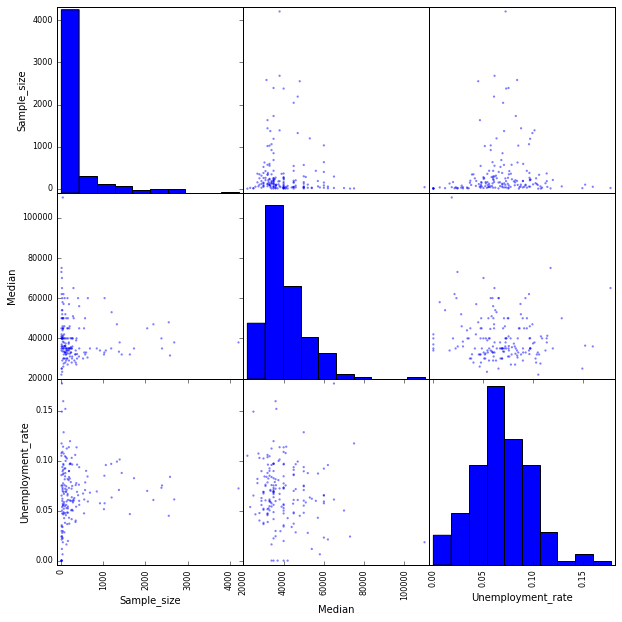

In [167]:
#3 by 3 scatter matrix Sample_size, Median, and Unemployment_rate
scatter_matrix(recent_grads[['Sample_size','Median','Unemployment_rate']], figsize=(10,10))

We can see there is not much correlation between sample size, median earnings, and unemployment rate.

# BarPlots

We'll next use bar plots to compare the median earnings of majors based on percentages of women from the first ten rows and last ten rows, as well as the unemployment rate for majors from the first and last ten rows.

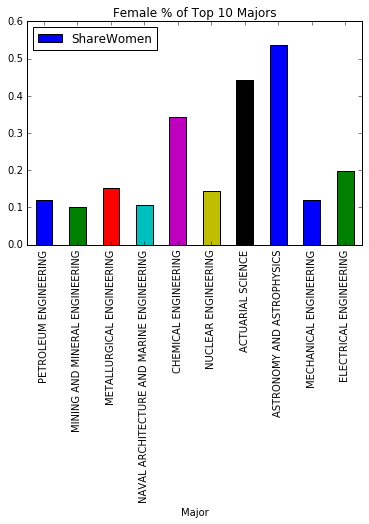

In [169]:
#bar plot of women percentage for top 10 majors
recent_grads[:10].plot.bar(x='Major', y='ShareWomen', title='Female % of Top 10 Majors')

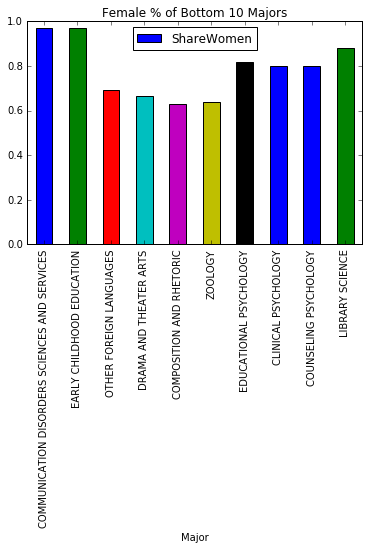

In [172]:
#bar plot of women percentage for bottom 10 majors
recent_grads[-10:].plot.bar(x='Major',y='ShareWomen', title = 'Female % of Bottom 10 Majors')


There is a much larger percentage of female graduates for lower earning majors compared to high earning majors, in the top 10 paying majors females did however make up almost 50% of both Astrologly & Astrophysics and Actuarial Science.

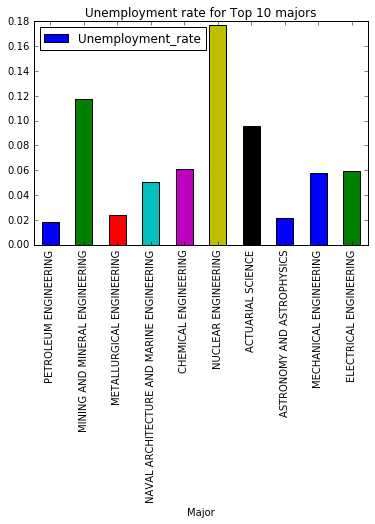

In [173]:
# unemployment rate for top 10 paying majors
recent_grads[:10].plot.bar(x='Major',y='Unemployment_rate', title='Unemployment rate for Top 10 majors')

Nuclear Engineering has the highest unemployment rate of the top 10 highest paying majors.

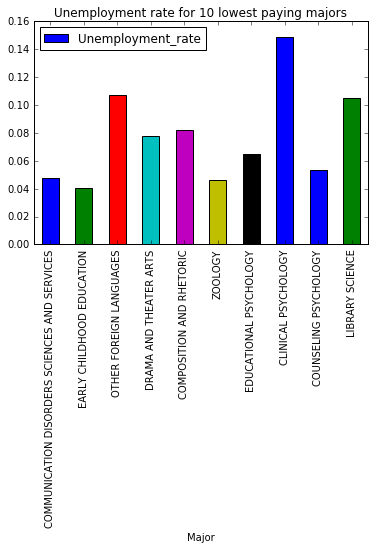

In [174]:
# unemployment rate for the 10 lowest paying majors
recent_grads[-10:].plot.bar(x='Major',y='Unemployment_rate', title='Unemployment rate for 10 lowest paying majors')

Clinical Psychology has the highest unemployment rate amongst the 10 lowest paying majors.